In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [22]:
df = pd.read_csv("C:\\Users\Ibad\Desktop\data.csv")
df

,space,price
0,1200,1500000
1,1400,1600000
2,1500,1750000
3,1800,2200000
4,1900,2400000
5,2100,2700000


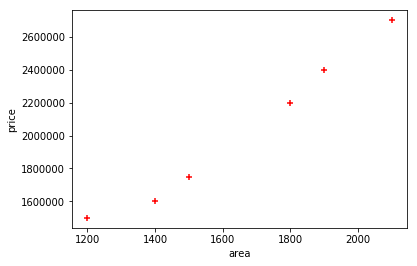

In [25]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.space, df.price, marker="+" ,color="red")

In [10]:
n_reg = linear_model.LinearRegression()
n_reg.fit(df[['area']],df.price)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
new_df = df.drop('price',axis='columns')
new_df

,space
0,1200
1,1400
2,1500
3,1800
4,1900
5,2100


In [12]:
price = df.price
price


0    1500000
1    1600000
2    1750000
3    2200000
4    2400000
5    2700000
Name: price, dtype: int64

In [13]:
n_reg = linear_model.LinearRegression()
n_reg.fit(new_df,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
n_reg.predict([[2000]]) #answer using model prediction

array([2516521.73913044])

In [15]:
n_reg.intercept_ #intercept(b)

-292173.91304347804

In [16]:
n_reg.coef_ #Slope(m)

array([1404.34782609])

In [17]:
1404.34782609 * 2000 - 292173.91304347804 #y = mx + b #answer using formula

2516521.7391365217

In [18]:
n_reg.predict([[2200]])

array([2797391.30434783])

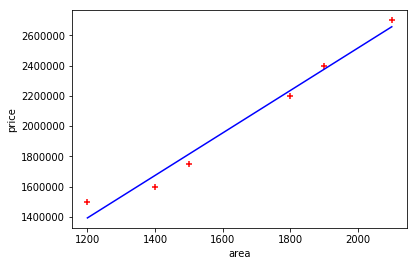

In [30]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.space, df.price, marker="+" ,color="red")
plt.plot(df.space, n_reg.predict(df[['space']]), color = "blue")

In [20]:
df_new = pd.read_csv("C:\\Users\Ibad\Desktop\data2.csv") #here below we pridict a coloum of values using our model and write it in to csv file
df_new

,Unnamed: 0,area,prices
0,0,1100,1252608.696
1,1,1150,1322826.087
2,2,1200,1393043.478
3,3,1250,1463260.870
4,4,1300,1533478.261
5,5,1350,1603695.652
6,6,1400,1673913.043
7,7,1450,1744130.435
8,8,1500,1814347.826


In [132]:
p = n_reg.predict(df_new)
p

array([1252608.69565217, 1322826.08695652, 1393043.47826087,
       1463260.86956522, 1533478.26086957, 1603695.65217391,
       1673913.04347826, 1744130.43478261, 1814347.82608696])

In [133]:
df_new["prices"] = p

In [134]:
df_new.to_csv("C:\\Users\Ibad\Desktop\data2.csv")

In [31]:
n_reg.predict([[2500]])

array([3218695.65217391])

## SAVE MODEL INTO A FILE USING PICKLE  

In [32]:
import pickle 

In [33]:
with open("model_pickle","wb") as f: #here i wirte my model into file
    pickle.dump(n_reg, f)

In [36]:
with open("model_pickle","rb") as f: #here i read my model from file and save it into a variable
    model = pickle.load(f)

In [35]:
model.predict([[2500]])  #test variable by predicting 

array([3218695.65217391])

## SAVE MODEL INTO A FILE USING JOBLIB  

In [37]:
from sklearn.externals import joblib

In [38]:
joblib.dump(n_reg,"model_joblib") #here i wirte my model into file

['model_joblib']

In [39]:
model2 = joblib.load('model_joblib') #here i read my model from file and save it into a variable

In [40]:
model2.predict([[2500]]) #test variable by predicting 

array([3218695.65217391])